# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03
1,Total,"Jan 01, 1979",1979/01/01,NaN,NaN,29.03
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35
3,Total,"Jan 02, 1979",1979/01/02,NaN,NaN,31.35
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66
...,...,...,...,...,...,...
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61
24103,Total,"Dec 30, 2011",2011/12/30,NaN,NaN,68.61
24104,NaN,"Dec 31, 2011",2011/12/31,Texas,48.0,73.49
24105,Total,"Dec 31, 2011",2011/12/31,NaN,NaN,73.49


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes !='Total']
print(df)
df.drop(['Notes'], axis =1)

      Notes Month Day, Year Month Day, Year Code  State  State Code  \
0       NaN    Jan 01, 1979           1979/01/01  Texas        48.0   
2       NaN    Jan 02, 1979           1979/01/02  Texas        48.0   
4       NaN    Jan 03, 1979           1979/01/03  Texas        48.0   
6       NaN    Jan 04, 1979           1979/01/04  Texas        48.0   
8       NaN    Jan 05, 1979           1979/01/05  Texas        48.0   
...     ...             ...                  ...    ...         ...   
24096   NaN    Dec 27, 2011           2011/12/27  Texas        48.0   
24098   NaN    Dec 28, 2011           2011/12/28  Texas        48.0   
24100   NaN    Dec 29, 2011           2011/12/29  Texas        48.0   
24102   NaN    Dec 30, 2011           2011/12/30  Texas        48.0   
24104   NaN    Dec 31, 2011           2011/12/31  Texas        48.0   

       Avg Daily Max Air Temperature (F)  
0                                  29.03  
2                                  31.35  
4                 

,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03
2,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35
4,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66
6,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30
8,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89
...,...,...,...,...,...
24096,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67
24098,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91
24100,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64
24102,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61


>3) Make a column called Date that is in the pandas datetime format

In [5]:
df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df[['Avg Daily Max Air Temperature (F)','Month Day, Year','Date']] 

/tmp/ipykernel_2220249/547367694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')


,Avg Daily Max Air Temperature (F),"Month Day, Year",Date
0,29.03,"Jan 01, 1979",1979-01-01
2,31.35,"Jan 02, 1979",1979-01-02
4,41.66,"Jan 03, 1979",1979-01-03
6,47.30,"Jan 04, 1979",1979-01-04
8,46.89,"Jan 05, 1979",1979-01-05
...,...,...,...
24096,56.67,"Dec 27, 2011",2011-12-27
24098,59.91,"Dec 28, 2011",2011-12-28
24100,66.64,"Dec 29, 2011",2011-12-29
24102,68.61,"Dec 30, 2011",2011-12-30


In [6]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05
...,...,...,...,...,...,...,...
24096,NaN,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67,2011-12-27
24098,NaN,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91,2011-12-28
24100,NaN,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64,2011-12-29
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df[['Year','Month','Day']] = df['Month Day, Year Code'].apply(lambda x: pd.Series(str(x).split("/")))

/tmp/ipykernel_2220249/1266574188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Year','Month','Day']] = df['Month Day, Year Code'].apply(lambda x: pd.Series(str(x).split("/")))
/tmp/ipykernel_2220249/1266574188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Year','Month','Day']] = df['Month Day, Year Code'].apply(lambda x: pd.Series(str(x).split("/")))
/tmp/ipykernel_2220249/1266574188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [8]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

/tmp/ipykernel_2220249/1970195628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later


In [9]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01,1979,01,01,2839968.0
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02,1979,01,02,2840832.0
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03,1979,01,03,2841696.0
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04,1979,01,04,2842560.0
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05,1979,01,05,2843424.0
...,...,...,...,...,...,...,...,...,...,...,...
24096,NaN,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67,2011-12-27,2011,12,27,13249440.0
24098,NaN,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91,2011-12-28,2011,12,28,13250304.0
24100,NaN,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64,2011-12-29,2011,12,29,13251168.0
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61,2011-12-30,2011,12,30,13252032.0


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

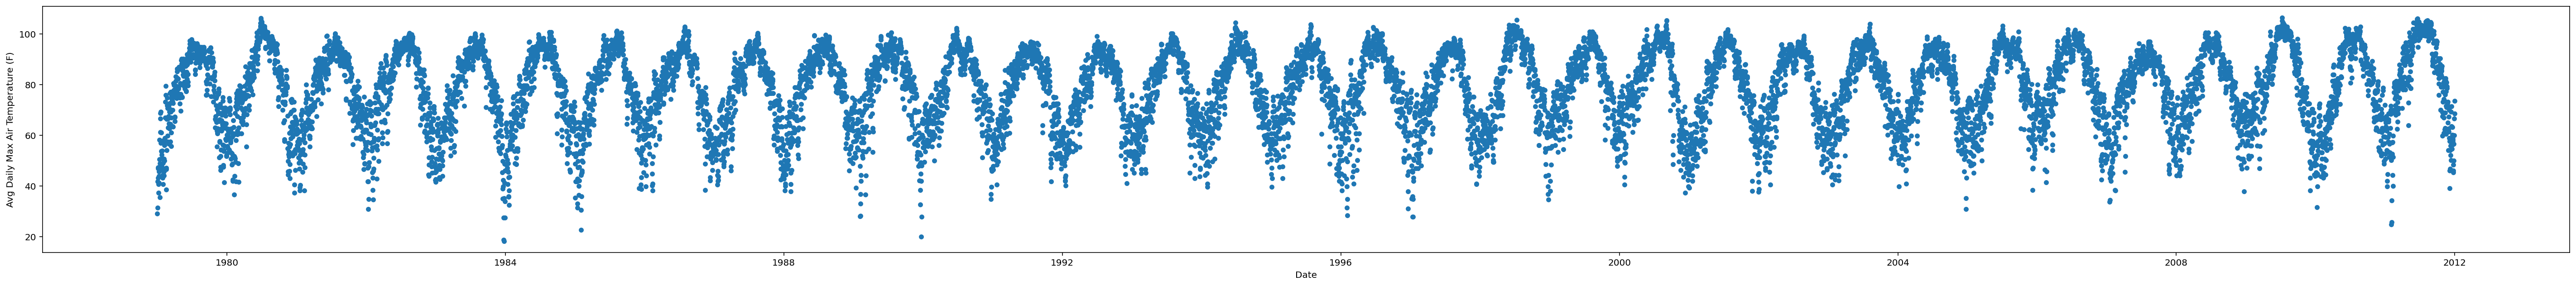

In [10]:
df.plot.scatter (x='Date', y='Avg Daily Max Air Temperature (F)', figsize= (50,5))

>5) Describe your plot.

In [11]:
#The plot is showing the different max air temperatures on fixed dates as well as between those fixed dates.

### Adding colors for our graph

In [13]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

/tmp/ipykernel_2220249/2382980842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row


>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

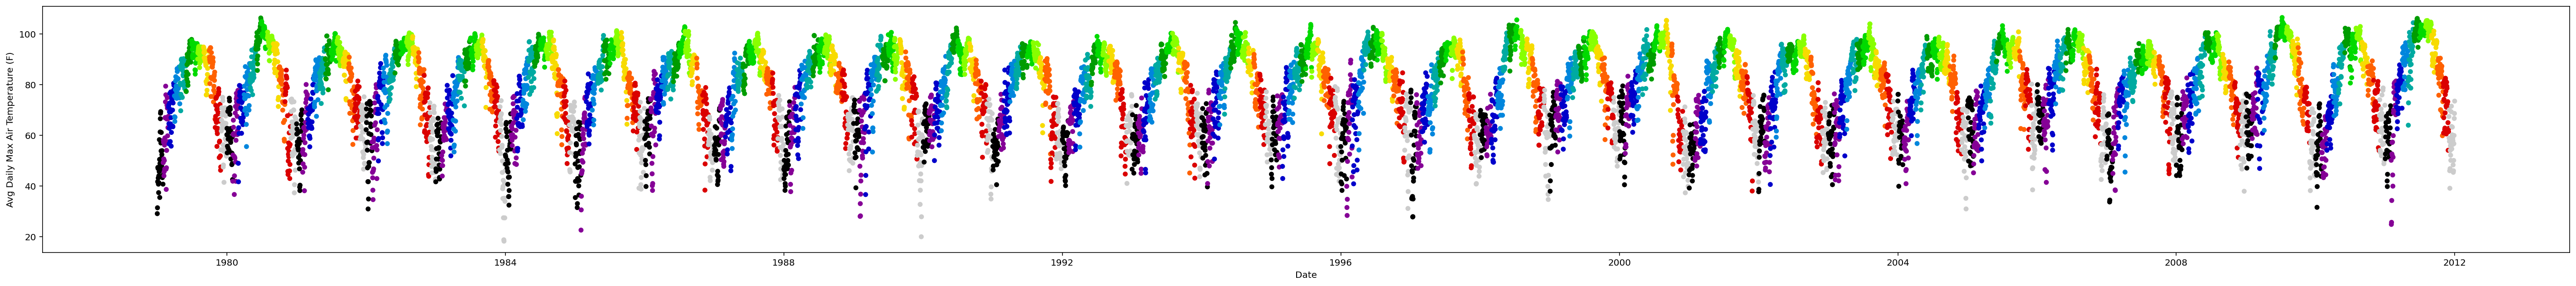

In [14]:
df.plot.scatter (x='Date', y='Avg Daily Max Air Temperature (F)', c=df['color'], figsize= (50,5))

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [15]:
subset = df[(df['Date']> pd.datetime(1980,1,1)) & (df['Date']< pd.datetime(1980,6,1))]
subset

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
732,NaN,"Jan 02, 1980",1980/01/02,Texas,48.0,62.73,1980-01-02,1980,01,02,3156192.0,#000000
734,NaN,"Jan 03, 1980",1980/01/03,Texas,48.0,53.06,1980-01-03,1980,01,03,3157056.0,#000000
736,NaN,"Jan 04, 1980",1980/01/04,Texas,48.0,55.68,1980-01-04,1980,01,04,3157920.0,#000000
738,NaN,"Jan 05, 1980",1980/01/05,Texas,48.0,59.98,1980-01-05,1980,01,05,3158784.0,#000000
740,NaN,"Jan 06, 1980",1980/01/06,Texas,48.0,69.42,1980-01-06,1980,01,06,3159648.0,#000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,"May 27, 1980",1980/05/27,Texas,48.0,89.82,1980-05-27,1980,05,27,3282336.0,#00aaa1
1026,NaN,"May 28, 1980",1980/05/28,Texas,48.0,90.33,1980-05-28,1980,05,28,3283200.0,#00aaa1
1028,NaN,"May 29, 1980",1980/05/29,Texas,48.0,91.71,1980-05-29,1980,05,29,3284064.0,#00aaa1
1030,NaN,"May 30, 1980",1980/05/30,Texas,48.0,92.94,1980-05-30,1980,05,30,3284928.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

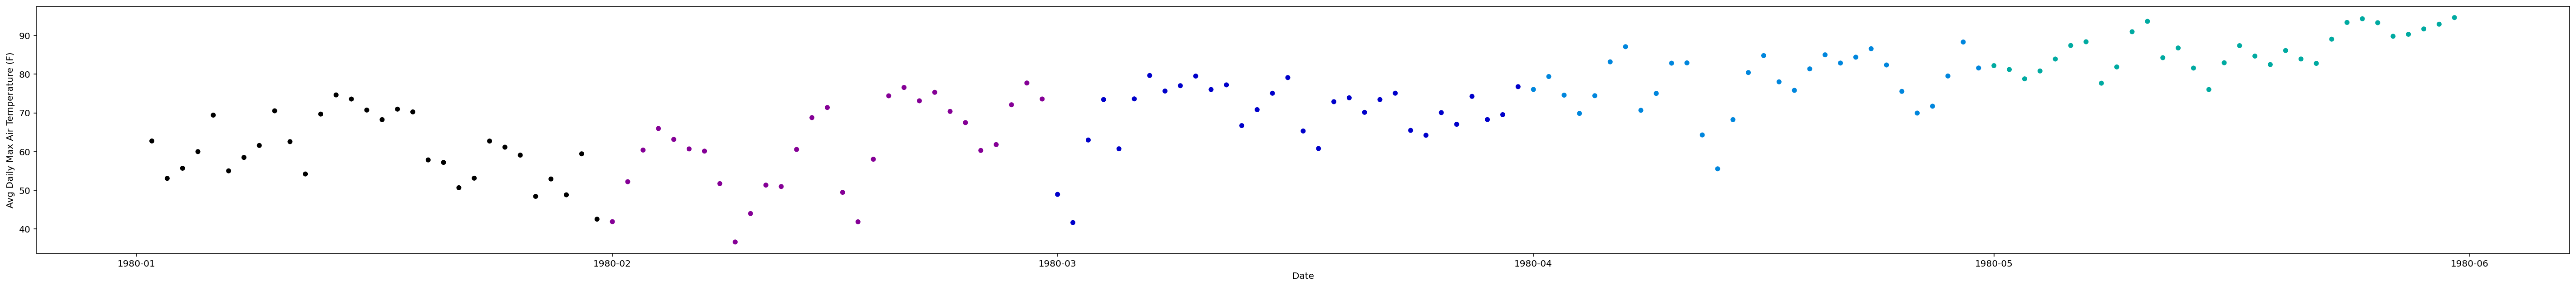

In [16]:
subset.plot.scatter (x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'],figsize= (50,5))

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [17]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [18]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [19]:
Y_pred = lin_reg(X,Y)

0.0002632206666408478 -776.5702707563609


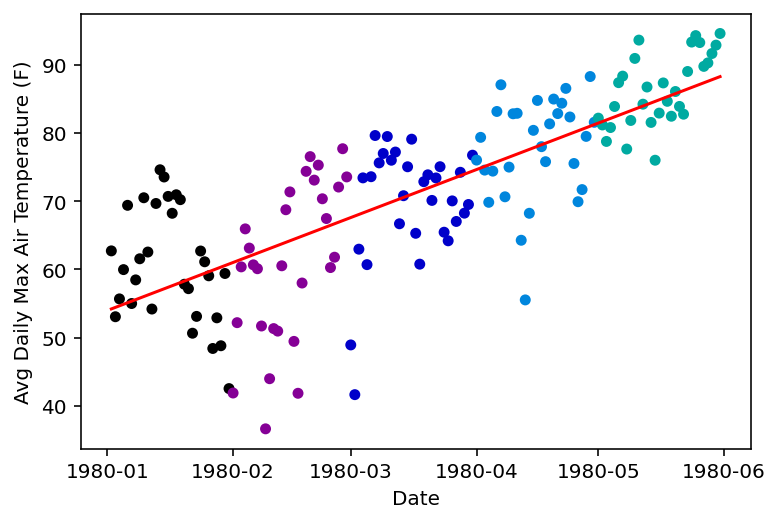

In [20]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [21]:
slope and intercept: 0.0002632206666408478 -776.5702707563609

SyntaxError: illegal target for annotation (818596415.py, line 1)

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [22]:
Y_pred.min()

54.204691530149944

In [23]:
Y_pred.max()

88.31808992680374

In [24]:
The slope is positive

SyntaxError: invalid syntax (2165272716.py, line 1)

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [25]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01,1979,01,01,2839968.0,#000000
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02,1979,01,02,2840832.0,#000000
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03,1979,01,03,2841696.0,#000000
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04,1979,01,04,2842560.0,#000000
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05,1979,01,05,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...,...,...,...
24096,NaN,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67,2011-12-27,2011,12,27,13249440.0,#cccccc
24098,NaN,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91,2011-12-28,2011,12,28,13250304.0,#cccccc
24100,NaN,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64,2011-12-29,2011,12,29,13251168.0,#cccccc
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61,2011-12-30,2011,12,30,13252032.0,#cccccc


3.072410840971274e-07 75.67019246681011


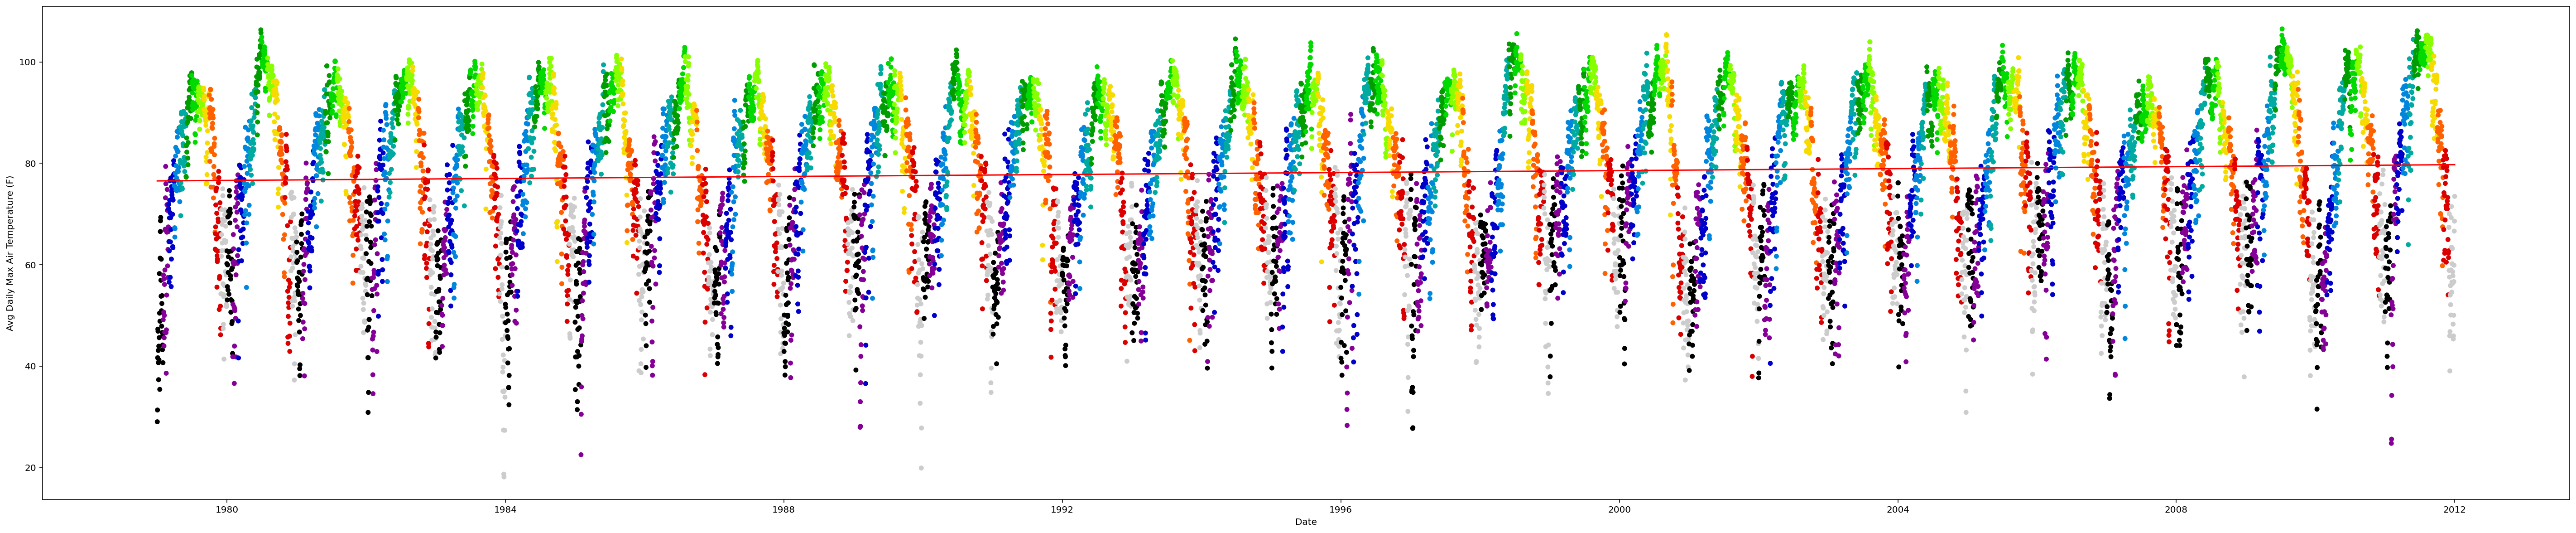

In [26]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values
Y_pred = lin_reg(X,Y)
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', c=df['color'], figsize=[50,10])
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [27]:
The slope is positive beacuse of the global warming

SyntaxError: invalid syntax (1740210511.py, line 1)